# Khaled Hamza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.Species.replace({'Iris-setosa':0,
                      'Iris-virginica':1 , 
                      'Iris-versicolor':2},inplace = True)

In [5]:
data = data.drop('Id' ,axis = 1)

In [6]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# K-Means Algorithm

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [8]:
num_clusters = []
for i in range(1,10):
  km = KMeans(n_clusters = i).fit(data)
  num_clusters.append(km.inertia_)

In [9]:
num_clusters

[780.8244,
 180.03640000000001,
 87.31002785114046,
 66.97905140650855,
 50.36703756613757,
 42.81487226823097,
 35.37212018456584,
 31.284012882447662,
 29.172022439836383]

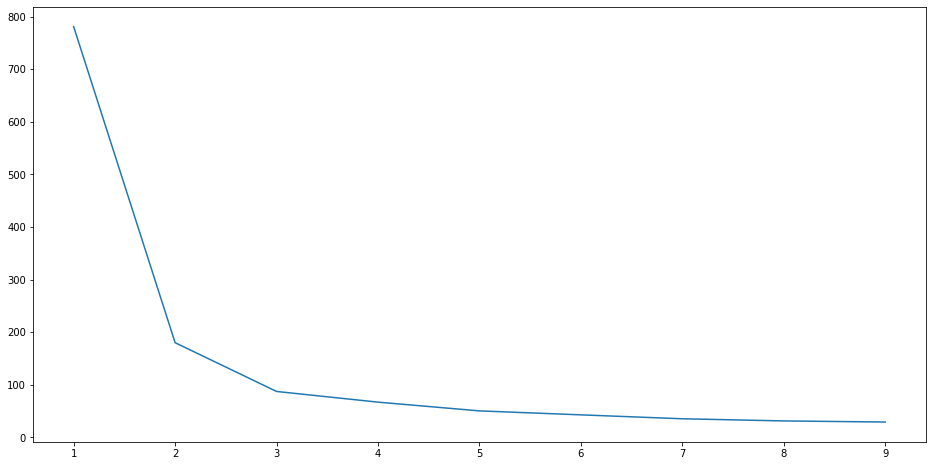

In [10]:
plt.figure(figsize=(16,8))
sns.lineplot(x=np.arange(1,10),y=num_clusters)

This technique is called elbow method and it's used to find the optimal number of clusters which is 3

In [11]:
km3 = KMeans(n_clusters=3).fit(data)

In [12]:
data1 = data[data.Species ==0]
data2 = data[data.Species ==1]
data3 = data[data.Species ==2]

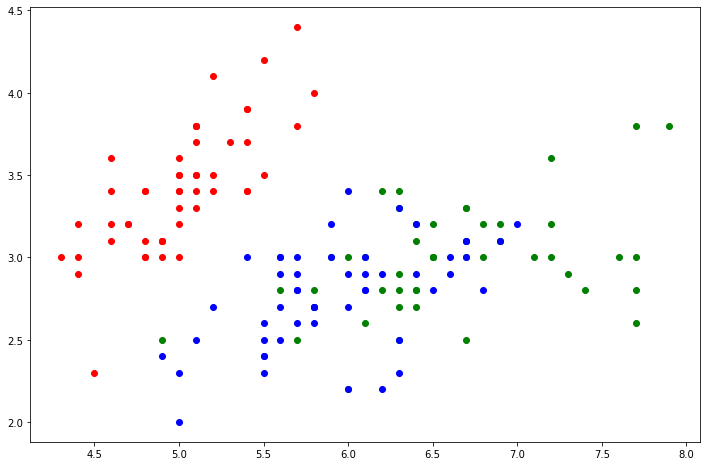

In [13]:
plt.figure(figsize = (12,8))

plt.scatter(data1[['SepalLengthCm']],data1[['SepalWidthCm']],color="red",label="setosa")

plt.scatter(data2[['SepalLengthCm']],data2[['SepalWidthCm']],color="green",label="versicolor")

plt.scatter(data3[['SepalLengthCm']],data3[['SepalWidthCm']],color="blue",label="verginica")

**The data is overlapping**

In [14]:
from sklearn.decomposition import PCA  

In [15]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(data)

In [16]:
new_df = pd.DataFrame(Xp,columns = ['principle_component1','principle_component2'])

In [17]:
new_df

,principle_component1,principle_component2
0,-2.856544,-0.364222
1,-2.881648,-0.081441
2,-3.050591,-0.077721
3,-2.910827,-0.019393
4,-2.899662,-0.367615
...,...,...
145,1.870995,-0.569408
146,1.473829,-0.147896
147,1.698818,-0.462131
148,1.829554,-0.566017


In [18]:
new_df['target']=km3.labels_

In [19]:
new_df

,principle_component1,principle_component2,target
0,-2.856544,-0.364222,1
1,-2.881648,-0.081441,1
2,-3.050591,-0.077721,1
3,-2.910827,-0.019393,1
4,-2.899662,-0.367615,1
...,...,...,...
145,1.870995,-0.569408,0
146,1.473829,-0.147896,0
147,1.698818,-0.462131,0
148,1.829554,-0.566017,0


In [20]:
new_df.target.nunique()

3

In [21]:
df1=new_df[new_df.target==0]
df2=new_df[new_df.target==1]
df3=new_df[new_df.target==2] 

Text(0.5, 1.0, 'Data clusters of setosa, versicolor and verginica')

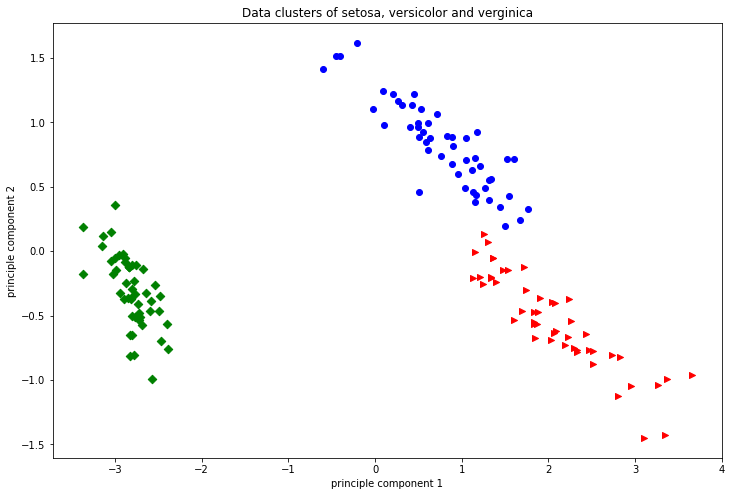

In [23]:
plt.figure(figsize = (12,8))
plt.scatter(df1.principle_component1,df1.principle_component2,color="red",label="setosa",marker='>')
plt.scatter(df2.principle_component1,df2.principle_component2,color="green",label="versiocolor",marker='D')
plt.scatter(df3.principle_component1,df3.principle_component2,color="blue",label="verginica")
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('Data clusters of setosa, versicolor and verginica')